This notebook shows how to use the easiest interface in HiGP for regression problems.

We use a simple example to show the basic usage of HiGP. In this example, we train a RBF (Gaussian) kernel GP for a one-dimensional function. We will be modeling the function

```math
y = 0.2 \sin(3 \pi x) \exp(4x) + \epsilon, \ 
\epsilon \sim \mathcal{N}(0, 0.09)
```

The regression can be calculated by `higp_py.ezgpr_torch()`. By default, it is in single precision.

In this example, we use the RBF (Gaussian) kernel function in the form
$$
\mathcal{K}(x,y)=f^2 \exp\left(\frac{-\|x - y\|_2^2}{2 l^2}\right).
$$

As we hope to make the actual parameters in $(0,\infty)$, we train our parameters in $\mathbb{R}$ and apply the softplus transformation to get the actual parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import higp
%matplotlib inline

In [2]:
# Generate the dataset
np.random.seed(42)
n_train = 200
n_test  = 1000
train_x = np.linspace(0, 1, n_train)
train_y = 0.2 * np.sin(3 * math.pi * train_x) * np.exp(4 * train_x) 
train_y += np.random.randn(train_x.size) * math.sqrt(0.09)
test_x  = np.sort(np.random.rand(n_test))
test_y  = 0.2 * np.sin(3 * math.pi * test_x) * np.exp(4 * test_x)
test_y += np.random.randn(test_x.size) * math.sqrt(0.09)

We first visualize the training set and testing set.

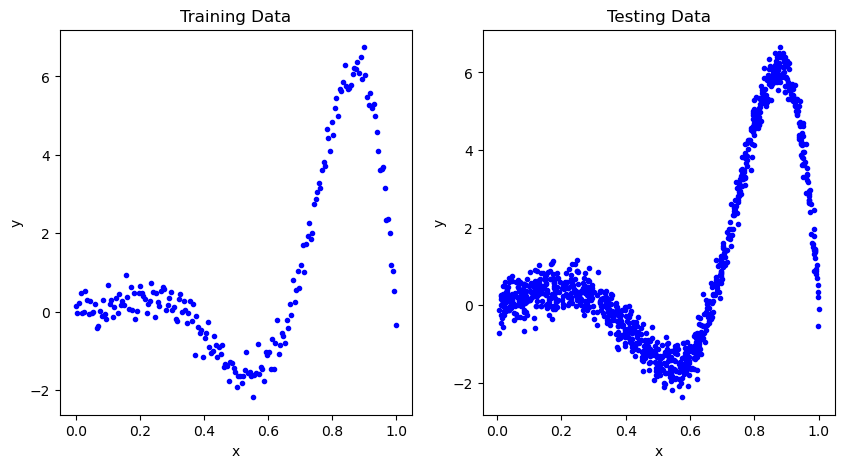

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(train_x, train_y, 'b.')
axs[0].set_title('Training Data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(test_x, test_y, 'b.')
axs[1].set_title('Testing Data')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()
plt.close(fig)

Next, we directly call the simplest interface.

We use a learning rate 0.1 by setting `adam_lr = 0.1`.

In [4]:
pred_y, std_y = higp.ezgpr_torch(train_x, train_y, test_x, test_y, adam_lr = 0.1, adam_maxits = 100)

Read 200 training / 1000 test data points
Data dimension: 1
Setting up GPR problem with 200 samples and 1 features
Init gpr problem done
Creating GPR problem
Data type: float
Kernel type: Gaussian
Transform type: softplus
Using preconditioned GP, kernel matrix form: dense / fall back to on-the-fly
AFN preconditioner parameters: rank 50, lfil 0
LanQ parameters: niter 10, nvec 10
Iteration (max 100), Elapsed time (sec), Loss, Hyperparameters (l, s, f, before nnt)
1, 0.18, 2.77837, -0.100, 0.100, 0.100
2, 0.18, 2.57451, -0.200, 0.199, 0.199
3, 0.19, 2.39972, -0.299, 0.296, 0.297
4, 0.19, 2.25158, -0.397, 0.391, 0.393
5, 0.19, 2.12604, -0.495, 0.483, 0.486
6, 0.19, 2.01792, -0.592, 0.572, 0.577
7, 0.20, 1.92163, -0.689, 0.656, 0.664
8, 0.20, 1.83191, -0.786, 0.734, 0.749
9, 0.20, 1.74486, -0.884, 0.807, 0.832
10, 0.20, 1.65901, -0.982, 0.871, 0.913
11, 0.20, 1.57577, -1.081, 0.927, 0.993
12, 0.20, 1.49819, -1.180, 0.974, 1.072
13, 0.20, 1.42884, -1.279, 1.011, 1.148
14, 0.21, 1.36947, -1.3

Visualize the prediction results.

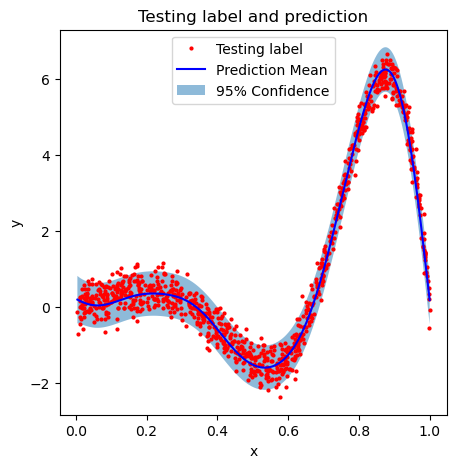

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(test_x, test_y, 'ro', markersize=2)
plt.plot(test_x, pred_y, 'b-')
plt.fill_between(test_x, pred_y - 1.96 * std_y, pred_y + 1.96 * std_y, alpha=0.5)
plt.title('Testing label and prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Testing label', 'Prediction Mean', '95% Confidence'], loc='upper center')
plt.show()
plt.close(fig)